In [2]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

In [3]:
boston_dataset = load_boston()

In [4]:
boston = pd.DataFrame(boston_dataset.data,
columns=boston_dataset.feature_names)[['RM', 'LSTAT', 'CRIM']]

In [5]:
boston.head()

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


<AxesSubplot:>

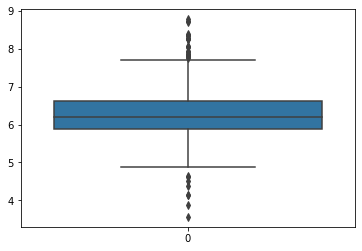

In [11]:
sns.boxplot(data=boston['RM'])

In [12]:
def find_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary

In [13]:
RM_upper_limit, RM_lower_limit = find_boundaries(boston, 'RM', 1.5)

In [14]:
print(RM_upper_limit, RM_lower_limit)

7.730499999999999 4.778500000000001


In [18]:
outliers_RM = np.where(boston['RM'] > RM_upper_limit, True, np.where(boston['RM'] < RM_lower_limit, True, False))

In [21]:
print(len(boston))

506


In [19]:
boston_trimmed = boston.loc[~(outliers_RM)]

In [22]:
print(len(boston_trimmed))

476
